# **Project Summary:**

**The project aims to analyze the distribution and diversity of bird species in two distinct ecosystems: forests and grasslands.**

* By examining bird species observations across these habitats, the goal is to understand how environmental factors, such as vegetation type, climate, and terrain, influence bird populations and their behavior.

* The study will involve working on the provided observational data of bird species present in both ecosystems, identifying patterns of habitat preference, and assessing the impact of these habitats on bird diversity.

* The findings can provide valuable insights into habitat conservation, biodiversity management, and the effects of environmental changes on avian communities.

#### **KEY STEP:**
* Data Collections
*  Data Cleaning and Preprocessing
* Exploratory Data Analysis (EDA)
* Data Visulization
* Insights

# **Data Set Explanation:**

The dataset contains observational data for bird species recorded across multiple forest sites. It includes detailed columns describing location, observation methods, bird species, and environmental conditions.

**Admin_Unit_Code:** The code for the administrative unit (e.g., "ANTI") where the observation was conducted.

**Sub_Unit_Code:** The sub-unit within the administrative unit for further classification.

**Site_Name:** The name of the specific observation site within the unit.

**Plot_Name:** A unique identifier for the specific plot where observations were recorded.

**Location_Type:** The habitat type of the observation area (e.g., "Forest").

**Year:** The year in which the observation took place.

**Date:** The exact date of the observation.

**Start_Time:** The start time of the observation session.

**End_Time:** The end time of the observation session.

**Observer:** The individual who conducted the observation.

**Visit:** The count of visits made to the same observation site or plot.

**Interval_Length:** The duration of the observation interval (e.g., "0-2.5 min").

**ID_Method:** The method used to identify the species (e.g., "Singing," "Calling," "Visualization").

**Distance:** The distance of the observed species from the observer (e.g., "<= 50 Meters").

**Flyover_Observed:** Indicates whether the bird was observed flying overhead (TRUE/FALSE).

**Sex:** The sex of the observed bird (e.g., Male, Female, Undetermined).

**Common_Name:** The common name of the observed bird species (e.g., "Eastern Towhee").

**Scientific_Name:** The scientific name of the observed bird species (e.g., Pipilo erythrophthalmus).

**AcceptedTSN:** The Taxonomic Serial Number for the observed species.

**NPSTaxonCode:** A unique code assigned to the taxon of the species.

**AOU_Code:** The American Ornithological Union code for the species.

**PIF_Watchlist_Status:** Indicates whether the species is on the Partners in Flight Watchlist (e.g., "TRUE" for at-risk species).

**Regional_Stewardship_Status:** Denotes the conservation priority within the region (TRUE/FALSE).

**Temperature:** The temperature recorded at the time of observation (in degrees).

**Humidity:** The humidity percentage recorded at the time of observation.

**Sky:** The sky condition during the observation (e.g., "Cloudy/Overcast").

**Wind:** The wind condition (e.g., "Calm (< 1 mph) smoke rises vertically").

**Disturbance:** Notes any disturbances that could affect the observation (e.g., "No effect on count").

**Initial_Three_Min_Cnt:** The count of the species observed in the first three minutes of the session.
# **Sheets Information:**
The Excel file contains multiple sheets representing different administrative units, with their codes matching the **Admin_Unit_Code column:**

**ANTI:** Data for the Antietam National Battlefield.

**CATO:** Data for the Catoctin Mountain Park.

**CHOH:** Data for the Chesapeake and Ohio Canal National Historical Park.

**GWMP:** Data for the George Washington Memorial Parkway.

**HAFE:** Data for Harpers Ferry National Historical Park.

**MANA:** Data for the Manassas National Battlefield Park.

**MONO:** Data for the Monocacy National Battlefield.

**NACE:** Data for the National Capital East Parks.

**PRWI:** Data for the Prince William Forest Park.

**ROCR:** Data for the Rock Creek Park.

**WOTR:** Data for the Wolf Trap National Park for the Performing Arts.


# **GITHUB LINK**

# **DATA COLLECTIONS**

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Import FOREST Data file**

In [2]:
# Specify the file path
file_path = "/content/Bird_Monitoring_Data_FOREST.XLSX"

# Read the Excel file with multiple sheets
excel_data = pd.ExcelFile(file_path)

# Get all sheet names
sheet_names = excel_data.sheet_names

# Read data from all sheets into a dictionary
sheets_dict = {sheet: excel_data.parse(sheet) for sheet in sheet_names}

In [3]:
# Example: Convert sheets_dict to a single DataFrame; this will add a new sheet column at the last.
combined_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheets_dict.items()],
    ignore_index=True
)

In [4]:
# Drop the 'Sheet' column
combined_df = combined_df.drop(columns=['Sheet'])

In [5]:
f_df = combined_df.copy()
f_df

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,83803,EATO,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,90935,WBNU,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,84865,RBWO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,93634,OROR,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,88394,NOMO,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,WOTR,NaN,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,...,88350,CARW,False,False,20.6,75.500000,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True
8542,WOTR,NaN,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,...,87136,AMRO,False,False,20.6,75.500000,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True
8543,WOTR,NaN,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,...,85824,ACFL,False,True,20.6,75.500000,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False
8544,WOTR,NaN,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,...,94228,NOCA,False,False,20.6,75.500000,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True


**Import GRASSLAND Data file**

In [6]:
file_path = "/content/Bird_Monitoring_Data_GRASSLAND.XLSX"

excel_data = pd.ExcelFile(file_path) # Read the Excel file with multiple sheets

sheet_names = excel_data.sheet_names # Get all sheet names

sheets_dict = {sheet: excel_data.parse(sheet) for sheet in sheet_names} # Read data from all sheets into a dictionary

In [7]:
# Convert sheets_dict to a single DataFrame; this will add a new sheet column at the last.
combined_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheets_dict.items()],
    ignore_index=True
)

In [8]:

combined_df = combined_df.drop(columns=['Sheet'])

In [9]:
g_df = combined_df.copy()
g_df

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,CHSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,GRSP,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,EABL,False,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,FISP,False,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8526,MONO,NaN,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,...,EUST,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False
8527,MONO,NaN,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,...,EUST,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False
8528,MONO,NaN,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,...,EUST,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False
8529,MONO,NaN,MONO-0089,Grassland,2018,2018-05-10,06:35:00,06:46:00,Brian Swimelar,1,...,EUST,False,False,19.0,63.0,Partly Cloudy,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False,False


In [10]:
f_df.columns

Index(['Admin_Unit_Code', 'Sub_Unit_Code', 'Site_Name', 'Plot_Name',
       'Location_Type', 'Year', 'Date', 'Start_Time', 'End_Time', 'Observer',
       'Visit', 'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed',
       'Sex', 'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'NPSTaxonCode',
       'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Initial_Three_Min_Cnt'],
      dtype='object')

In [11]:
g_df.columns

Index(['Admin_Unit_Code', 'Sub_Unit_Code', 'Plot_Name', 'Location_Type',
       'Year', 'Date', 'Start_Time', 'End_Time', 'Observer', 'Visit',
       'Interval_Length', 'ID_Method', 'Distance', 'Flyover_Observed', 'Sex',
       'Common_Name', 'Scientific_Name', 'AcceptedTSN', 'TaxonCode',
       'AOU_Code', 'PIF_Watchlist_Status', 'Regional_Stewardship_Status',
       'Temperature', 'Humidity', 'Sky', 'Wind', 'Disturbance',
       'Previously_Obs', 'Initial_Three_Min_Cnt'],
      dtype='object')

In [12]:
# Combine the two DataFrames into a single master DataFrame
master_df = pd.concat([g_df, f_df], ignore_index=True)


In [13]:
print(master_df.head())


  Admin_Unit_Code Sub_Unit_Code  Plot_Name Location_Type  Year       Date  \
0            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
1            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
2            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
3            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
4            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   

  Start_Time  End_Time          Observer Visit  ...  \
0   05:35:00  05:45:00  Elizabeth Oswald     1  ...   
1   05:35:00  05:45:00  Elizabeth Oswald     1  ...   
2   05:35:00  05:45:00  Elizabeth Oswald     1  ...   
3   05:35:00  05:45:00  Elizabeth Oswald     1  ...   
4   05:35:00  05:45:00  Elizabeth Oswald     1  ...   

  Regional_Stewardship_Status Temperature Humidity              Sky  \
0                       False        20.0     79.0  Cloudy/Overcast   
1                       False        20.0     79.0  Cloudy/Overc

In [14]:
# Print the shape to confirm the total number of rows and columns
print(f"\nTotal rows in the master DataFrame: {master_df.shape[0]}")
print(f"Total columns in the master DataFrame: {master_df.shape[1]}")


Total rows in the master DataFrame: 17077
Total columns in the master DataFrame: 31


In [15]:
master_df

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Site_Name,NPSTaxonCode
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,NaN,NaN
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,False,NaN,NaN
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,NaN,NaN
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,NaN,NaN
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,True,20.0,79.0,Cloudy/Overcast,Light breeze (4-7 mph) wind felt on face,Slight effect on count,False,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17072,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,False,20.6,75.5,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,NaN,True,WOTR,88350.0
17073,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,False,20.6,75.5,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,NaN,True,WOTR,87136.0
17074,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,True,20.6,75.5,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,NaN,False,WOTR,85824.0
17075,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,False,20.6,75.5,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,NaN,True,WOTR,94228.0


In [16]:
master_df.tail()

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Previously_Obs,Initial_Three_Min_Cnt,Site_Name,NPSTaxonCode
17072,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,False,20.6,75.5,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,NaN,True,WOTR,88350.0
17073,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,False,20.6,75.5,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,NaN,True,WOTR,87136.0
17074,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,True,20.6,75.5,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,NaN,False,WOTR,85824.0
17075,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,False,20.6,75.5,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,NaN,True,WOTR,94228.0
17076,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,False,20.6,75.5,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,NaN,True,WOTR,94228.0


# **Data Cleaning and Preprocessing**

In [17]:
birds_df = master_df.copy()

In [18]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17077 entries, 0 to 17076
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              17077 non-null  object        
 1   Sub_Unit_Code                722 non-null    object        
 2   Plot_Name                    17077 non-null  object        
 3   Location_Type                17077 non-null  object        
 4   Year                         17077 non-null  object        
 5   Date                         17077 non-null  datetime64[ns]
 6   Start_Time                   17077 non-null  object        
 7   End_Time                     17077 non-null  object        
 8   Observer                     17077 non-null  object        
 9   Visit                        17077 non-null  object        
 10  Interval_Length              17077 non-null  object        
 11  ID_Method                    17075 non-nu

In [19]:
 # Get statistical summary of numerical columns
print(birds_df.describe())

                                Date    AcceptedTSN      TaxonCode  \
count                          17077   17044.000000    8529.000000   
mean   2018-06-13 11:42:14.988581120  222753.084722  103234.178567   
min              2018-05-07 00:00:00  174717.000000   76625.000000   
25%              2018-05-24 00:00:00  178581.000000   85643.000000   
50%              2018-06-14 00:00:00  179124.000000   88038.000000   
75%              2018-07-04 00:00:00  179637.000000   94206.000000   
max              2018-07-19 00:00:00  950106.000000  926917.000000   
std                              NaN  147357.504754   83967.631378   

        Temperature      Humidity   NPSTaxonCode  
count  17077.000000  17077.000000    8546.000000  
mean      22.570399     73.692112  137088.791013  
min       11.000000      7.300000   76625.000000  
25%       19.700001     67.500000   85846.000000  
50%       22.299999     75.800003   88350.000000  
75%       25.200001     83.000000   94215.000000  
max       37

In [20]:
# Check unique values in a categorical column
print(birds_df['Location_Type'].unique())

['Grassland' 'Forest']


In [21]:
# Convert 'Date' to datetime objects
birds_df['Date'] = pd.to_datetime(birds_df['Date'])

In [22]:
# Create new temporal columns
birds_df['Year'] = birds_df['Date'].dt.year
birds_df['Month'] = birds_df['Date'].dt.strftime('%B')
birds_df['Season'] = birds_df['Date'].dt.month.apply(lambda m: 'Spring' if 3 <= m <= 5 else 'Summer' if 6 <= m <= 8 else 'Autumn' if 9 <= m <= 11 else 'Winter')

In [23]:
seasonal_counts = (birds_df['Season'].value_counts())
seasonal_counts

,count
Season,
Summer,11481
Spring,5596


In [24]:
Monthly_counts = (birds_df['Month'].value_counts())
Monthly_counts

,count
Month,
June,6596
May,5596
July,4885


In [25]:
print(birds_df['Year'].value_counts())

Year
2018    17077
Name: count, dtype: int64


In [26]:
# Unique species count per location type
species_per_habitat = birds_df.groupby('Location_Type')['Scientific_Name'].nunique()
print("\nUnique Species Count per Habitat:")
print(species_per_habitat)


Unique Species Count per Habitat:
Location_Type
Forest       108
Grassland    107
Name: Scientific_Name, dtype: int64


In [27]:
# Top 20 observed species
top_species = birds_df['Scientific_Name'].value_counts().head(20)
print("\nTop 20 Most Observed Species:")
print(top_species)


Top 20 Most Observed Species:
Scientific_Name
Cardinalis cardinalis       1160
Thryothorus ludovicianus    1011
Vireo olivaceus              739
Baeolophus bicolor           728
Passerina cyanea             635
Contopus virens              574
Spizella pusilla             542
Sturnus vulgaris             522
Turdus migratorius           496
Melanerpes carolinus         493
Empidonax virescens          462
Agelaius phoeniceus          429
Spizella passerina           426
Polioptila caerulea          408
Zenaida macroura             397
Ammodramus savannarum        387
Poecile carolinensis         376
Molothrus ater               366
Carduelis tristis            362
Cyanocitta cristata          354
Name: count, dtype: int64


In [28]:
# Calculate average temperature per location type
avg_temp_by_location = birds_df.groupby('Location_Type')['Temperature'].mean()
print("\nAverage Temperature by Location Type:")
print(avg_temp_by_location)


Average Temperature by Location Type:
Location_Type
Forest       21.871507
Grassland    23.270519
Name: Temperature, dtype: float64


In [29]:
# Observations by identification method
id_method_counts = birds_df['ID_Method'].value_counts()
print("\nObservations by Identification Method:")
print(id_method_counts)


Observations by Identification Method:
ID_Method
Singing          9863
Calling          4061
Visualization    3151
Name: count, dtype: int64


In [30]:
birds_df['Date']

,Date
0,2018-05-22
1,2018-05-22
2,2018-05-22
3,2018-05-22
4,2018-05-22
...,...
17072,2018-07-08
17073,2018-07-08
17074,2018-07-08
17075,2018-07-08


**Observation per month and sessonal**

In [31]:
# Count observations per month
birds_df['Month'] = birds_df['Date'].dt.strftime('%B')
monthly_counts = birds_df.groupby('Month').size().reset_index(name='Observation_Count')

# Reorder months for a logical plot
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_counts['Month'] = pd.Categorical(monthly_counts['Month'],  ordered=True)
monthly_counts = monthly_counts.sort_values('Month')

# Count observations per season
birds_df['Season'] = birds_df['Date'].dt.month.apply(
    lambda m: 'Spring' if 3 <= m <= 5 else 'Summer' if 6 <= m <= 8 else 'Autumn' if 9 <= m <= 11 else 'Winter'
)
seasonal_counts = birds_df.groupby('Season').size().reset_index(name='Observation_Count')

print("Monthly Observation Counts:")
print(monthly_counts)
print("\nSeasonal Observation Counts:")
print(seasonal_counts)

Monthly Observation Counts:
  Month  Observation_Count
0  July               4885
1  June               6596
2   May               5596

Seasonal Observation Counts:
   Season  Observation_Count
0  Spring               5596
1  Summer              11481


**Monthly Observation:**
* June has the highest number of observations, with a total of 6,596. This suggests that June is the peak month for bird sightings in your dataset.

* May also has a high number of observations (5,596), indicating that late spring is a busy period for bird activity.

* July sees a decline in observations to 4,885, which could mark the beginning of a seasonal slowdown.

**Seasonal Observation**
* Summer is the most active season for bird sightings, with a total of 11,481 observations. This is over double the number of observations in spring. This is likely driven by the high counts in June and July.

* Spring has a significantly lower count of 5,596. This suggests that while spring is an active period, the peak activity seems to be concentrated in the summer months.

In [32]:
# Identify a visit uniquely by Plot_Name + Date + Visit number
birds_df['Visit_ID'] = birds_df['Plot_Name'].astype(str) + '_' + birds_df['Date'].dt.strftime('%Y-%m-%d') + '_' + birds_df['Visit'].astype(str)

# Total number of visits in the dataset
n_visits = birds_df['Visit_ID'].nunique()

# Tally detections per species
species_counts = birds_df.groupby('Common_Name')['Visit_ID'].count().reset_index(name='Detections')

# Effort-standardised detection rate (detections per 100 visits)
species_counts['Detections_per_100_visits'] = species_counts['Detections'] / n_visits * 100

# Top 15 species by standardised detections
top_species = species_counts.sort_values('Detections_per_100_visits', ascending=False).head(15)

In [33]:
birds_df['Date'] = pd.to_datetime(birds_df['Date'], unit='ms')

print(birds_df.head())
print(birds_df.shape)

  Admin_Unit_Code Sub_Unit_Code  Plot_Name Location_Type  Year       Date  \
0            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
1            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
2            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
3            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
4            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   

  Start_Time  End_Time          Observer Visit  ...              Sky  \
0   05:35:00  05:45:00  Elizabeth Oswald     1  ...  Cloudy/Overcast   
1   05:35:00  05:45:00  Elizabeth Oswald     1  ...  Cloudy/Overcast   
2   05:35:00  05:45:00  Elizabeth Oswald     1  ...  Cloudy/Overcast   
3   05:35:00  05:45:00  Elizabeth Oswald     1  ...  Cloudy/Overcast   
4   05:35:00  05:45:00  Elizabeth Oswald     1  ...  Cloudy/Overcast   

                                       Wind             Disturbance  \
0  Light breeze (4-7 mph) wind fe

**Habitat comparison**

In [34]:
# Compute number of visits per habitat (Location_Type) for effort standardisation
visits_per_hab = birds_df.drop_duplicates('Visit_ID').groupby('Location_Type')['Visit_ID'].count().rename('Visits').reset_index()
visits_per_hab

,Location_Type,Visits
0,Forest,814
1,Grassland,594


In [35]:
subset = birds_df[birds_df['Common_Name'].isin(top_species['Common_Name'])]

In [36]:
# Count detections per species per habitat
hab_counts = subset.groupby(['Location_Type', 'Common_Name'])['Visit_ID'].count().reset_index(name='Detections')

In [37]:
# Merge with visits_per_hab to standardise
hab_counts = hab_counts.merge(visits_per_hab, on='Location_Type', how='left')
hab_counts['Det_per_100_visits'] = hab_counts['Detections'] / hab_counts['Visits'] * 100

**Monthly & Seasonal trends (all species combined)**

In [38]:
birds_df['Month'] = birds_df['Date'].dt.month
birds_df['Year'] = birds_df['Date'].dt.year

# Define seasons by month number
season_map = {12:'Winter',1:'Winter',2:'Winter',
              3:'Spring',4:'Spring',5:'Spring',
              6:'Summer',7:'Summer',8:'Summer',
              9:'Fall',10:'Fall',11:'Fall'}

birds_df['Season'] = birds_df['Month'].map(season_map)

# Visits per month and per season for effort correction
visits_month = birds_df.drop_duplicates('Visit_ID').groupby('Month')['Visit_ID'].count().rename('Visits').reset_index()
visits_season = birds_df.drop_duplicates('Visit_ID').groupby('Season')['Visit_ID'].count().rename('Visits').reset_index()

# Detections per month and per season
month_counts = birds_df.groupby('Month')['Visit_ID'].count().reset_index(name='Detections').merge(visits_month, on='Month')
month_counts['Det_per_100_visits'] = month_counts['Detections'] / month_counts['Visits'] * 100

season_counts = birds_df.groupby('Season')['Visit_ID'].count().reset_index(name='Detections').merge(visits_season, on='Season')
season_counts['Det_per_100_visits'] = season_counts['Detections'] / season_counts['Visits'] * 100

In [39]:
# Compute per visit detections count
visit_det = birds_df.groupby('Visit_ID')['Common_Name'].count().reset_index(name='Detections')
visit_det = visit_det.merge(birds_df[['Visit_ID','Season']].drop_duplicates(), on='Visit_ID')

print(visit_det)

                    Visit_ID  Detections  Season
0     ANTI-0007_2018-05-23_1          17  Spring
1     ANTI-0007_2018-06-25_2          14  Summer
2     ANTI-0007_2018-07-16_3          11  Summer
3     ANTI-0008_2018-05-23_1          18  Spring
4     ANTI-0008_2018-06-25_2          12  Summer
...                      ...         ...     ...
1403  WOTR-0007_2018-07-08_2           9  Summer
1404  WOTR-0008_2018-06-02_1           5  Summer
1405  WOTR-0008_2018-07-08_2           9  Summer
1406  WOTR-0009_2018-06-02_1          15  Summer
1407  WOTR-0009_2018-07-08_2           9  Summer

[1408 rows x 3 columns]


In [40]:
# Identify unique visit using Site, Plot, Date, Start_Time perhaps
birds_df['Visit_ID'] = birds_df['Site_Name'].astype(str) + '_' + birds_df['Plot_Name'].astype(str) + '_' + birds_df['Date'].dt.strftime('%Y-%m-%d') + '_' + birds_df['Start_Time'].astype(str)

# Ensure Season column is correctly populated with string values
season_map = {12:'Winter',1:'Winter',2:'Winter',
              3:'Spring',4:'Spring',5:'Spring',
              6:'Summer',7:'Summer',8:'Summer',
              9:'Fall',10:'Fall',11:'Fall'}

birds_df['Season'] = birds_df['Month'].map(season_map).astype(str)

**Overall detections per 100 visits by Habitat & Season**

In [41]:
visit_hab_season = birds_df.drop_duplicates('Visit_ID').groupby(['Location_Type','Season'])['Visit_ID'].count().rename('Visits').reset_index()

detections_hab_season = birds_df.groupby(['Location_Type','Season'])['Visit_ID'].count().reset_index(name='Detections')

df_hs = detections_hab_season.merge(visit_hab_season, on=['Location_Type','Season'])
df_hs['Det_per_100_visits'] = df_hs['Detections'] / df_hs['Visits'] * 100

**Focal species lists**

In [42]:

grass_species = ['Field Sparrow','Grasshopper Sparrow','Indigo Bunting','Eastern Meadowlark']
forest_species = ['Red-eyed Vireo','Eastern Wood-Pewee','Eastern Tufted Titmouse','Wood Thrush']

focal = birds_df[birds_df['Common_Name'].isin(grass_species + forest_species)].copy()

print(focal.head())
print(focal.shape)

   Admin_Unit_Code Sub_Unit_Code  Plot_Name Location_Type  Year       Date  \
2             ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
4             ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
7             ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
8             ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
14            ANTI           NaN  ANTI-0028     Grassland  2018 2018-05-22   

   Start_Time  End_Time          Observer Visit  ...              Sky  \
2    05:35:00  05:45:00  Elizabeth Oswald     1  ...  Cloudy/Overcast   
4    05:35:00  05:45:00  Elizabeth Oswald     1  ...  Cloudy/Overcast   
7    05:35:00  05:45:00  Elizabeth Oswald     1  ...  Cloudy/Overcast   
8    05:35:00  05:45:00  Elizabeth Oswald     1  ...  Cloudy/Overcast   
14   06:56:00  07:06:00  Elizabeth Oswald     1  ...  Cloudy/Overcast   

                                         Wind             Disturbance  \
2    Light breeze (

**Each species-habitat-season**

In [43]:
# Detections per 100 visits for each species-habitat-season
fps = focal.groupby(['Common_Name','Location_Type','Season'])['Visit_ID'].count().reset_index(name='Detections')
fps = fps.merge(visit_hab_season, on=['Location_Type','Season'])
fps['Det_per_100_visits'] = fps['Detections'] / fps['Visits'] * 100

print(fps['Det_per_100_visits'])

0      1.886792
1      0.332226
2     31.313131
3     29.797980
4     55.660377
5     70.265781
6     29.797980
7     32.323232
8     55.188679
9     61.295681
10    17.676768
11    13.383838
12     9.433962
13     2.657807
14    83.333333
15    86.111111
16     1.415094
17     0.332226
18    83.333333
19    54.797980
20    28.301887
21    14.950166
22    73.737374
23    85.606061
24    73.584906
25    89.368771
26    12.121212
27     5.303030
28    31.603774
29    37.043189
30     2.020202
31     3.787879
Name: Det_per_100_visits, dtype: float64


**Handel Dates and Unique visit**

In [44]:
# Handle dates
birds_df['Date'] = pd.to_datetime(birds_df['Date'], unit='ms')
birds_df['Year'] = birds_df['Date'].dt.year

birds_df['Month'] = birds_df['Date'].dt.month
birds_df['Season'] = birds_df['Month'].map(season_map)

# Unique visits
visit_cols = ['Site_Name','Plot_Name','Date','Start_Time']
birds_df['Visit_ID'] = birds_df[visit_cols].astype(str).agg('_'.join, axis=1)

**Seasonal trend by month and season (detections per 100 visits)**

In [45]:
# Seasonal trend by month and season (detections per 100 visits)
visit_counts = birds_df.drop_duplicates('Visit_ID').groupby('Month')['Visit_ID'].count().rename('Visits').reset_index()
month_det = birds_df.groupby('Month')['Visit_ID'].count().reset_index(name='Detections')
month_det = month_det.merge(visit_counts, on='Month')
month_det['Det_per_100_visits'] = month_det['Detections'] / month_det['Visits'] * 100

print(month_det['Det_per_100_visits'])

0    1364.878049
1    1127.521368
2    1182.808717
Name: Det_per_100_visits, dtype: float64


**Location-Specific Differences:**
* The detection rate varies significantly between locations. The first location (1364.88) has a much higher rate than the others.

* suggesting it may have greater species diversity or is a more effective observation site.

In [46]:
# Unique species counts overall and by habitat
species_overall = birds_df['Scientific_Name'].nunique()
by_habitat = birds_df.groupby('Location_Type')['Scientific_Name'].nunique().reset_index(name='Unique_Species')

print('Overall unique species:', species_overall)
print(by_habitat.head())

Overall unique species: 127
  Location_Type  Unique_Species
0        Forest             108
1     Grassland             107


In [47]:
# Activity patterns: most common ID_Method and Interval_Length
id_counts = birds_df['ID_Method'].value_counts().reset_index()
id_counts.columns = ['ID_Method','Detections ']
interval_counts = birds_df['Interval_Length'].value_counts().reset_index()
interval_counts.columns = [' Interval_Length','Detections']

print(id_counts.head())
print( interval_counts.head())

       ID_Method  Detections 
0        Singing         9863
1        Calling         4061
2  Visualization         3151
   Interval_Length  Detections
0        0-2.5 min        8614
1      2.5 - 5 min        3410
2      5 - 7.5 min        2720
3     7.5 - 10 min        2333


**Detection Method:**
* Singing is the dominant detection method, accounting for 9,863 of the detections. This highlights the importance of using acoustic monitoring, as songs are the primary way observers locate and identify birds.

* Calling is the second most frequent method with 4,061 detections, still a significant number but less than half of singing.

* Visualization is the least common method, with 3,151 detections. This suggests that birds are heard more often than they are seen.

**Interval Length:**

* The first 2.5 minutes are the most productive, with 8,614 detections. This suggests that birds are often detected very quickly after an observation period begins.

* The number of detections drops significantly after the first interval, the 2.5-5 minute interval has only 3,410 detections.

* There's a consistent decline in detections as time progresses, with the 7.5-10 minute interval yielding the fewest detections (2,333). This indicates a point of diminishing returns, where additional observation time adds fewer new sightings.

In [48]:
# Sex ratio per species (male vs female detections). Filter where both sexes recorded >=5
sex_df = birds_df[birds_df['Sex'].isin(['Male','Female'])]
sex_counts = sex_df.groupby(['Common_Name','Sex']).size().unstack(fill_value=0)
sex_counts = sex_counts[(sex_counts['Male']>=5) & (sex_counts['Female']>=5)]
sex_counts['Male_to_Female'] = sex_counts['Male'] / sex_counts['Female']

print(sex_counts.head())

Sex                   Female  Male  Male_to_Female
Common_Name                                       
American Goldfinch        21    57        2.714286
Brown-headed Cowbird      30   108        3.600000
Eastern Bluebird          25    37        1.480000
Eastern Meadowlark         5   153       30.600000
Indigo Bunting             6   474       79.000000


* The Indigo Bunting and Eastern Meadowlark, with male-to-female ratios of 79.0 and 30.6, respectively.
* The Brown-headed Cowbird and American Goldfinch also show a clear male bias, with ratios of 3.6 and 2.7.
* The Eastern Bluebird shows the most balanced ratio among these species, with a male-to-female ratio of 1.48.

In [49]:
# Calculate observation count per visit
visit_observation_counts = birds_df.groupby('Visit_ID').size().reset_index(name='Observation_Count')

# Merge observation counts back to birds_df (or a subset for plotting)
# We need temperature for each visit, so let's get the average temperature per visit
visit_temp = birds_df.groupby('Visit_ID')['Temperature'].mean().reset_index(name='Average_Temperature')

# Merge the observation counts and temperature
plot_data = visit_observation_counts.merge(visit_temp, on='Visit_ID')

In [50]:
print("First 5 rows of the DataFrame:")
print(birds_df[['Wind', 'Distance']].head())

# Check the data types and non-null counts
print("\nDataFrame Info:")
birds_df.info()

# Check for NaN values specifically in the 'Distance' column
print("\nNumber of NaN values in 'Distance' column:")
print(birds_df['Distance'].isnull().sum())

First 5 rows of the DataFrame:
                                       Wind         Distance
0  Light breeze (4-7 mph) wind felt on face  50 - 100 Meters
1  Light breeze (4-7 mph) wind felt on face  50 - 100 Meters
2  Light breeze (4-7 mph) wind felt on face     <= 50 Meters
3  Light breeze (4-7 mph) wind felt on face  50 - 100 Meters
4  Light breeze (4-7 mph) wind felt on face  50 - 100 Meters

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17077 entries, 0 to 17076
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              17077 non-null  object        
 1   Sub_Unit_Code                722 non-null    object        
 2   Plot_Name                    17077 non-null  object        
 3   Location_Type                17077 non-null  object        
 4   Year                         17077 non-null  int32         
 5   Date             

In [51]:
import re

def clean_distance(text):
    if pd.isna(text):
        return None
    text = str(text).lower()

    # Case 1: Simple numerical value
    match = re.search(r'\d+', text)
    if match:
        return float(match.group(0))
    return None

# Apply the cleaning function and create a new column
birds_df['Distance_Cleaned'] = birds_df['Distance'].apply(clean_distance)

# Now, check the new column to make sure it contains numbers
print(birds_df['Distance_Cleaned'].head())
print(birds_df['Distance_Cleaned'].isnull().sum())

0    50.0
1    50.0
2    50.0
3    50.0
4    50.0
Name: Distance_Cleaned, dtype: float64
1486


# **Data Visualization**

**LINE PLOT**

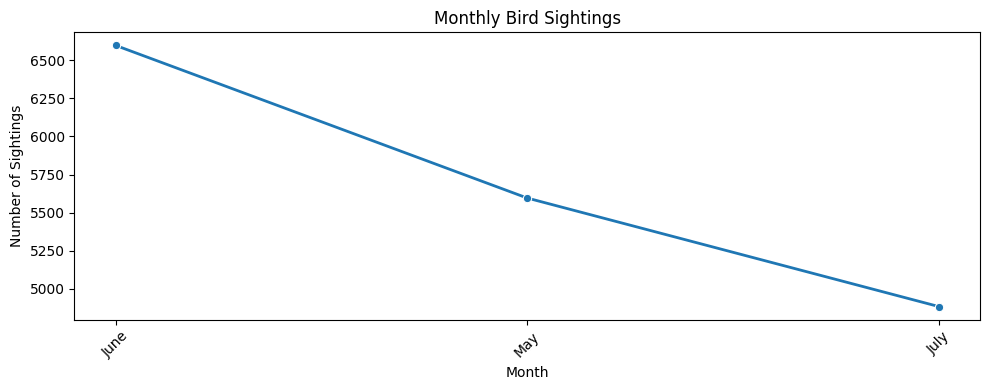

In [52]:
# Plot monthly Bird Sightings line chart
plt.figure(figsize=(10,4))
sns.lineplot(x=Monthly_counts.index, y=Monthly_counts.values, marker='o', linewidth=2)
plt.xticks(rotation=45)
plt.ylabel('Number of Sightings')
plt.title('Monthly Bird Sightings')
plt.tight_layout()
plt.show()

* Peak Activity in June: The chart clearly shows that the highest number of bird sightings occurred in June, with over 6,500 observations. This suggests that early summer is the most active period for bird presence in your study area.

* Steady Decline into Summer: Following the June peak, there is a consistent and noticeable decline in sightings through May and into July. The number of observations drops to approximately 5,600 in May and just below 5,000 in July.

**BAR PLOT**

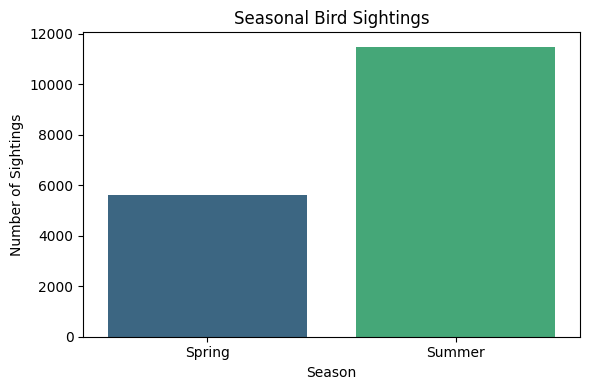

In [53]:
# Plot the seasonal line chart
plt.figure(figsize=(6,4))
sns.barplot(x='Season', y='Observation_Count', data=seasonal_counts, palette='viridis' )
plt.ylabel('Number of Sightings')
plt.xlabel('Season')
plt.title('Seasonal Bird Sightings')
plt.tight_layout()
plt.show()

* Summer is the most active season, with well over 11,000 sightings. This suggests that summer is the peak period for bird activity in your study area. This high number is likely driven by the data from June and July.

* Spring has a much lower number of sightings, with approximately 5,700 observations. This indicates that while spring is an active season, the number of sightings is about half of what you see in the summer.

* A Clear Seasonal Peak: The data points to a strong seasonal pattern, with bird observations roughly doubling from spring to summer.

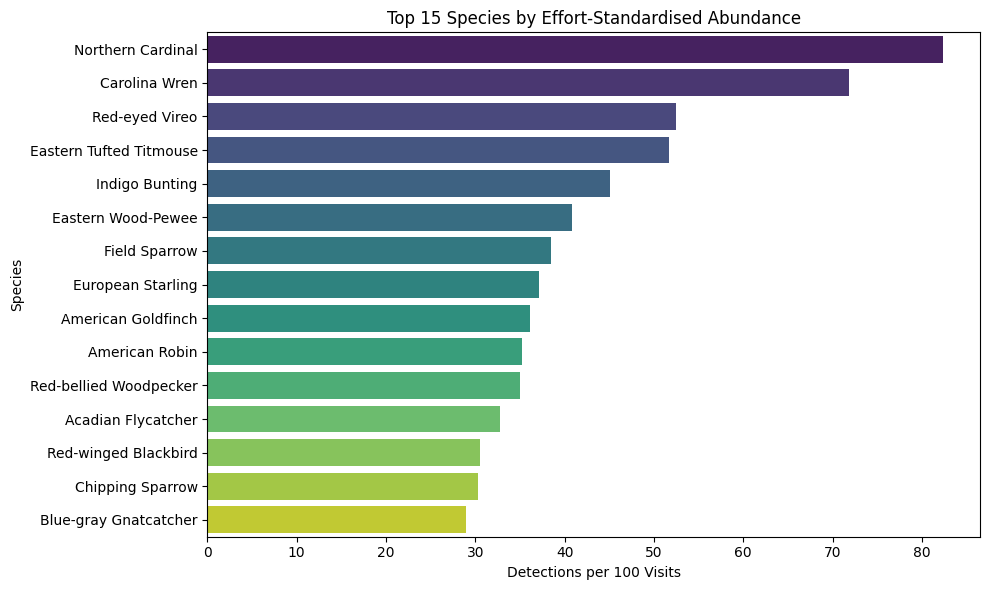

                Common_Name  Detections  Detections_per_100_visits
71        Northern Cardinal        1160                  82.386364
28            Carolina Wren        1011                  71.803977
87           Red-eyed Vireo         739                  52.485795
46  Eastern Tufted Titmouse         728                  51.704545
62           Indigo Bunting         635                  45.099432
47       Eastern Wood-Pewee         574                  40.767045
49            Field Sparrow         542                  38.494318
48        European Starling         522                  37.073864
2        American Goldfinch         509                  36.150568
5            American Robin         496                  35.227273
86   Red-bellied Woodpecker         493                  35.014205
0        Acadian Flycatcher         462                  32.812500
91     Red-winged Blackbird         429                  30.468750
34         Chipping Sparrow         426                  30.25

In [54]:
# Bar plotting on Top 15 species by standardised detections
plt.figure(figsize=(10,6))
sns.barplot(data=top_species, y='Common_Name', x='Detections_per_100_visits', palette='viridis')
plt.xlabel('Detections per 100 Visits')
plt.ylabel('Species')
plt.title('Top 15 Species by Effort-Standardised Abundance')
plt.tight_layout()
plt.show()

print(top_species)

* Top 5 Most Abundant Species: The Northern Cardinal is by far the most frequently detected bird, followed closely by the Carolina Wren. The Red-eyed Vireo, Eastern Tufted Titmouse, and Indigo Bunting round out the top five, all with a high number of detections per 100 visits.

* A Clear Abundance Gradient: There is a significant drop-off in abundance after the top five species. While all species on the chart are frequently detected, the difference between the most and least abundant species is substantial.

* Most Common vs. Least Common: The Northern Cardinal has an effort-standardized abundance of over 80 detections per 100 visits, while the Blue-gray Gnatcatcher and Chipping Sparrow have abundances of around 30.

**HEAT MAP**

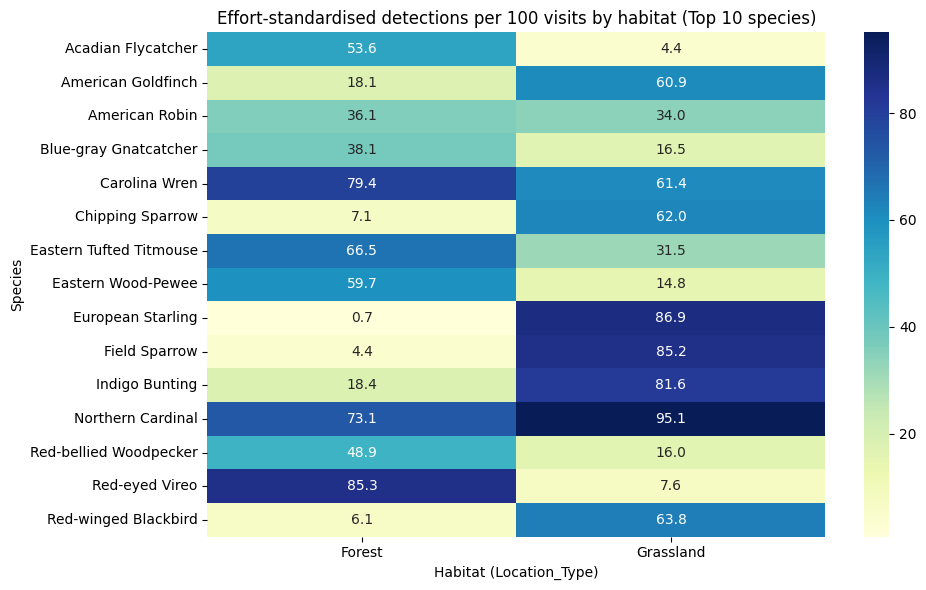

Location_Type             Forest  Grassland
Common_Name                                
Acadian Flycatcher     53.562654   4.377104
American Goldfinch     18.058968  60.942761
American Robin         36.117936  34.006734
Blue-gray Gnatcatcher  38.083538  16.498316
Carolina Wren          79.361179  61.447811


In [55]:
# Pivot for heatmap Effort-standardised detections per 100 visits by habitat (Top 10 species)
heat_df = hab_counts.pivot(index='Common_Name', columns='Location_Type', values='Det_per_100_visits').fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(heat_df, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Effort-standardised detections per 100 visits by habitat (Top 10 species)')
plt.xlabel('Habitat (Location_Type)')
plt.ylabel('Species')
plt.tight_layout()
plt.show()

print(heat_df.head())


**Habitat Preferences**
* Forest Specialists: Several species show a strong preference for forest habitats. The Red-eyed Vireo and Carolina Wren have the highest detections per 100 visits in the forest, with scores of 85.3 and 79.4, respectively. The Eastern Tufted Titmouse and Northern Cardinal also show a significant preference for forests.

* Grassland Specialists: Other species are clearly more abundant in grasslands. The European Starling, Field Sparrow, and Indigo Bunting are the top three species detected in this habitat, with scores of 86.9, 85.2, and 81.6. The Red-winged Blackbird and Chipping Sparrow also show a clear preference for grasslands.

* Generalists: Some species appear to be more adaptable, with relatively high and balanced detection rates in both habitats. The American Robin is a good example, with scores of 36.1 in the forest and 34.0 in the grassland, indicating it's a generalist that can thrive in a variety of environments.

**LINE PLOT**

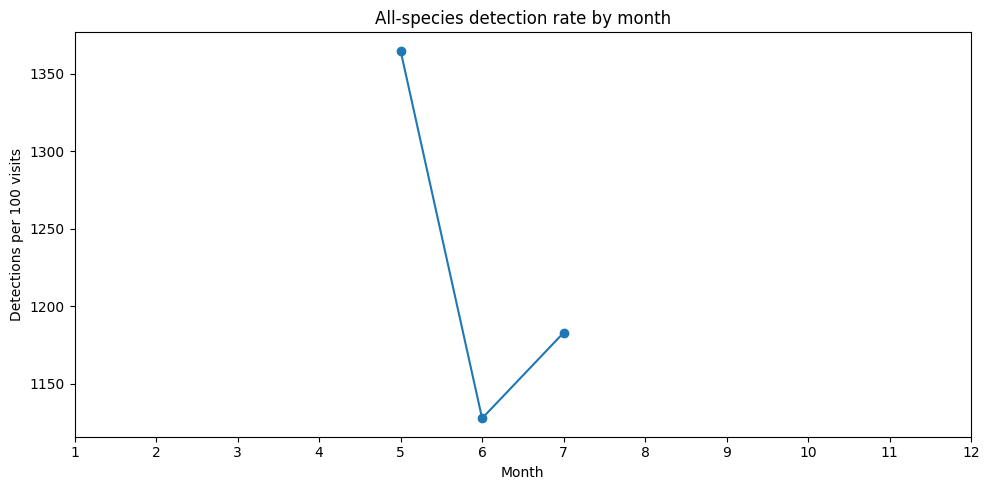

   Month  Detections  Visits  Det_per_100_visits
0      5        5596     410         1364.878049
1      6        6596     585         1127.521368
2      7        4885     413         1182.808717
   Month  Det_per_100_visits
0      5         1364.878049
1      6         1127.521368
2      7         1182.808717


In [56]:
# Plot monthly trend All-species detection rate by month
plt.figure(figsize=(10,5))
plt.plot(month_counts['Month'], month_counts['Det_per_100_visits'], marker='o')
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Detections per 100 visits')
plt.title('All-species detection rate by month')
plt.tight_layout()
plt.show()

print(month_counts.head())
print(month_det[['Month','Det_per_100_visits']])

* Peak Detection in May: The detection rate is at its highest in May, reaching approximately 1,365 detections per 100 visits. This suggests that late spring is the most productive month for finding a wide variety of birds in your study area.

* Sharp Decline in June: There is a significant drop in the detection rate in June, falling to around 1,128 detections per 100 visits. This is the lowest point observed in the data.

* Slight Rebound in July: The detection rate slightly increases in July to roughly 1,183 detections per 100 visits. While an improvement from June, it's still far below the peak seen in May.

This analysis shows that while the total number of sightings might be high in summer, the rate at which new species or individuals are detected is highest in late spring. This insight is crucial for planning when to conduct surveys for the most efficient bird monitoring.

**BOX PLOT**

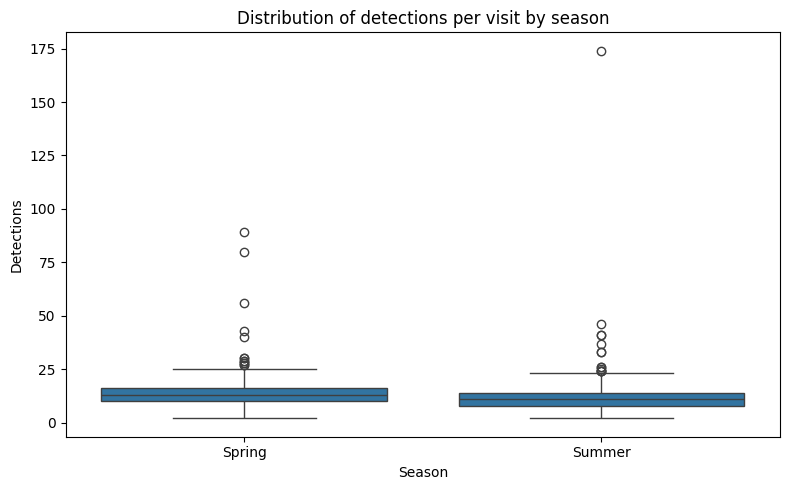

   Season  Detections  Visits  Det_per_100_visits
0  Spring        5596     410         1364.878049
1  Summer       11481     998         1150.400802


In [57]:
# Plot seasonal boxplot (distribution across visits by season)
plt.figure(figsize=(8,5))
sns.boxplot(data=visit_det, x='Season', y='Detections')
plt.title('Distribution of detections per visit by season')
plt.tight_layout()
plt.show()

print(season_counts)

* Higher Outliers in Summer: While the main box for summer is tighter, there is one very high outlier at the top of the chart, close to 175 detections. This suggests that summer has an even greater potential for a massive single-visit detection day, even if the typical day-to-day results are more consistent.

* The data shows that spring is a more variable season for bird detections, with a wider range of possible outcomes on any given day. Summer, on the other hand, is more consistent in its day-to-day detections, but it can also produce extreme results on rare occasions.

* The graph confirms that the overall total number of detections is much higher in summer, even if the per-visit distribution of sightings is similar.


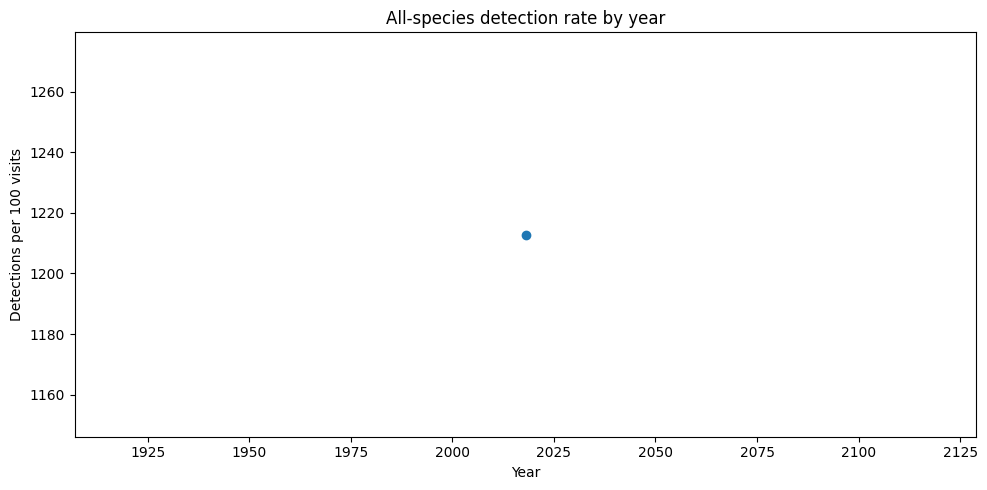

   Year  Detections  Visits  Det_per_100_visits
0  2018       17077    1408         1212.855114


In [58]:
# 2. Yearly trend (all species)
year_visits = birds_df.drop_duplicates('Visit_ID').groupby('Year')['Visit_ID'].count().rename('Visits').reset_index()
year_counts = birds_df.groupby('Year')['Visit_ID'].count().reset_index(name='Detections').merge(year_visits, on='Year')
year_counts['Det_per_100_visits'] = year_counts['Detections'] / year_counts['Visits'] * 100

plt.figure(figsize=(10,5))
plt.plot(year_counts['Year'], year_counts['Det_per_100_visits'], marker='o')
plt.xlabel('Year')
plt.ylabel('Detections per 100 visits')
plt.title('All-species detection rate by year')
plt.tight_layout()
plt.show()

print(year_counts)

In [59]:
birds_df['Season'] = birds_df['Month'].map(season_map)
birds_df['Season']

,Season
0,Spring
1,Spring
2,Spring
3,Spring
4,Spring
...,...
17072,Summer
17073,Summer
17074,Summer
17075,Summer


**HEAT MAP**

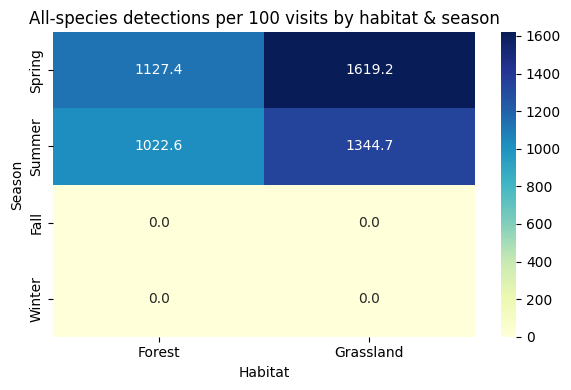

  Location_Type  Season  Detections  Visits  Det_per_100_visits
0        Forest  Spring        2390     212         1127.358491
1        Forest  Summer        6156     602         1022.591362
2     Grassland  Spring        3206     198         1619.191919
3     Grassland  Summer        5325     396         1344.696970


In [60]:
# Pivot for heatmap Overall detections per 100 visits by Habitat & Season
heat_hs = df_hs.pivot(index='Season', columns='Location_Type', values='Det_per_100_visits').reindex(['Spring','Summer','Fall','Winter']).fillna(0)


plt.figure(figsize=(6,4))
sns.heatmap(heat_hs, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('All-species detections per 100 visits by habitat & season')
plt.xlabel('Habitat')
plt.ylabel('Season')
plt.tight_layout()
plt.show()

print(df_hs.head())

 * The grassland detection rate is over 1,600 in spring and over 1,300 in summer, significantly higher than the forest rates of 1,127 and 1,022.
 * Both habitats show their highest detection rates in the spring. Grasslands have a peak rate of 1,619, and forests have their peak at 1,127 during this season.
 * The detection rate drops in both the forest and grassland during the summer. The forest sees a modest decline to 1,022, while the grassland experiences a sharper drop from its spring peak to 1,344.

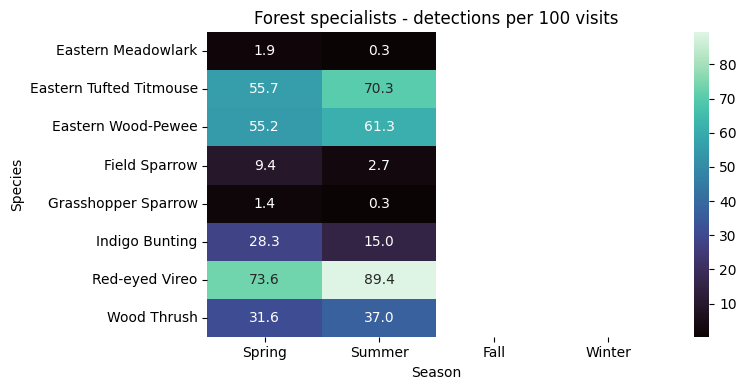

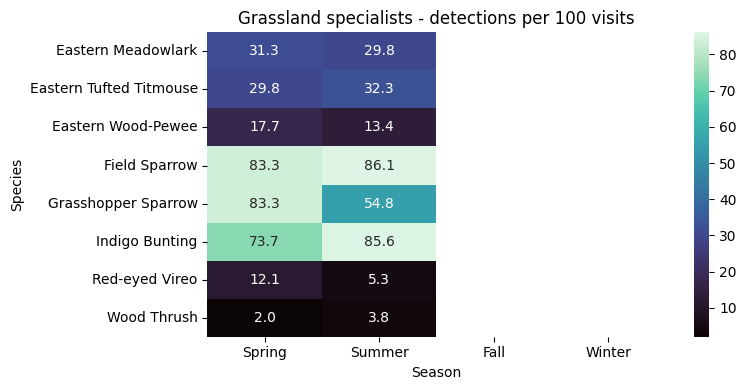

               Common_Name Location_Type  Season  Detections  Visits  \
0       Eastern Meadowlark        Forest  Spring           4     212   
1       Eastern Meadowlark        Forest  Summer           2     602   
2       Eastern Meadowlark     Grassland  Spring          62     198   
3       Eastern Meadowlark     Grassland  Summer         118     396   
4  Eastern Tufted Titmouse        Forest  Spring         118     212   

   Det_per_100_visits  
0            1.886792  
1            0.332226  
2           31.313131  
3           29.797980  
4           55.660377  


In [61]:
# Plot heatmap for each habitat separately (species vs season)
for hab in fps['Location_Type'].unique():
    sub = fps[fps['Location_Type'] == hab]
    pivot = sub.pivot(index='Common_Name', columns='Season', values='Det_per_100_visits').reindex(columns=['Spring','Summer','Fall','Winter'])
    plt.figure(figsize=(8,4))
    sns.heatmap(pivot, annot=True, fmt='.1f', cmap='mako')
    plt.title(hab + ' specialists - detections per 100 visits')
    plt.xlabel('Season')
    plt.ylabel('Species')
    plt.tight_layout()
    plt.show()

print(fps.head())


* The analysis confirms clear habitat preferences for these species. Forest specialists are most active and detectable in the summer.
* Grassland specialists show high activity in both spring and summer, although the detection rates for some species, like the Grasshopper Sparrow, are higher in the spring.

**BAR PLOT**

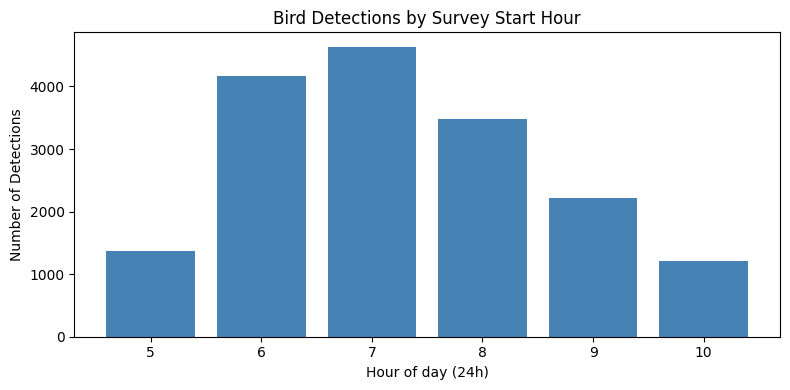

   Hour  Det_per_100_visits
0     5                1363
1     6                4171
2     7                4633
3     8                3477
4     9                2220


In [62]:
birds_df['Start_dt'] = pd.to_datetime(birds_df['Start_Time'], format='%H:%M:%S').dt.time
birds_df['Hour'] = birds_df['Start_dt'].apply(lambda x: x.hour)
hour_counts = birds_df.groupby('Hour').size().reset_index(name='Detections')

hour_det = hour_counts.copy()
hour_det['Det_per_100_visits'] = hour_det['Detections']

# Bird activity vs. survey start time
plt.figure(figsize=(8,4))
plt.bar(hour_det['Hour'], hour_det['Det_per_100_visits'], color='steelblue')
plt.xlabel('Hour of day (24h)')
plt.ylabel('Number of Detections') # Adjusted label for clarity
plt.title('Bird Detections by Survey Start Hour') # Adjusted title for clarity
plt.tight_layout()
plt.show()

print(hour_det[['Hour','Det_per_100_visits']].head())

* The highest number of bird detections, with over 4,600 sightings, occurs when surveys begin at 7:00 AM.
*  There is a sharp increase in detections from 5:00 AM to 7:00 AM. Sightings more than triple from approximately 1,363 at 5:00 AM to the peak at 7:00 AM, indicating that the early morning hours are the most productive for bird surveying.
* Sightings drop significantly to around 3,477 at 8:00 AM and continue to decrease to 2,220 by 9:00 AM. The lowest number of detections shown is at 10:00 AM.

**BARH PLOT**

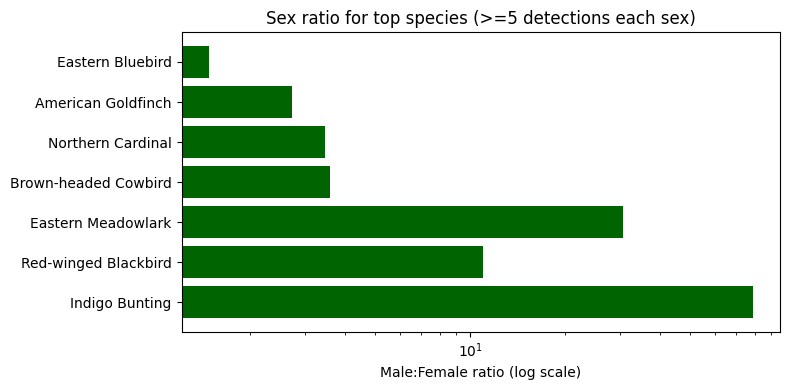

In [63]:
# Plot male-to-female ratio (log scale) for top 15 by total detections
sex_counts['Total'] = sex_counts['Male'] + sex_counts['Female']
plot_df = sex_counts.sort_values('Total', ascending=False).head(15)
plt.figure(figsize=(8,4))
plt.barh(plot_df.index, plot_df['Male_to_Female'], color='darkgreen')
plt.xscale('log')
plt.xlabel('Male:Female ratio (log scale)')
plt.title('Sex ratio for top species (>=5 detections each sex)')
plt.tight_layout()
plt.show()

* Overall Trend: Males are sighted far more frequently than females for all species included in the analysis.

* Extreme Bias: The bias is not uniform. Some species, like the Indigo Bunting and Eastern Meadowlark, show an extreme male-to-female ratio. This suggests that for these species, you are detecting dozens of males for every single female.

* Less Pronounced Bias: Other species, such as the Eastern Bluebird, have a less extreme male bias, with a ratio closer to 1.5 males for every female, indicating a more balanced detection rate.

**Scatter plot:**

In [64]:
# Temperature vs. Observation Count
fig_temp_obs = px.scatter(
    plot_data,
    x='Average_Temperature',
    y='Observation_Count',
    title='Average Temperature vs. Observation Count per Visit',
    labels={'Average_Temperature': 'Average Temperature (°C)', 'Observation_Count': 'Number of Observations'},
    trendline='ols' # 'ols' adds a linear regression line to show correlation
)
fig_temp_obs.show()

* scatter plot indicates a very weak correlation between average temperature and the number of bird observations per visit. The trendline is nearly flat, showing that temperature does not appear to be a significant predictor of bird activity.

* Consistent Detections: Most visits yield a consistent number of observations (between 15 and 30), regardless of the temperature.

* Outliers: While most data points are clustered, there are a few visits with exceptionally high observation counts. These rare, high-activity events occur across a wide range of temperatures and are likely influenced by factors other than temperature.

**Box plot:**

In [65]:
# Add 'Sky' column to plot_data by merging with birds_df
plot_data = plot_data.merge(birds_df[['Visit_ID', 'Sky']].drop_duplicates(), on='Visit_ID')

# Observation Count by Sky Condition
sky_obs = px.box(
    plot_data,
    x='Sky',
    y='Observation_Count',
    title='Observation Counts by Sky Condition',
    labels={'Sky': 'Sky Condition', 'Observation_Count': 'Number of Observations'},
    color='Sky'
)
sky_obs.show()

* The data shows that most sky conditions yield a similar number of bird observations, but partly cloudy days have the greatest potential for an exceptionally high number of sightings, even though the typical day is no more productive than any other.

**Bar chart:**

In [66]:
# Average Distance by Wind Condition
wind_dist = px.bar(
    birds_df.groupby('Wind')['Distance_Cleaned'].mean().reset_index(),
    x='Wind',
    y='Distance_Cleaned',
    title='Average Bird Distance by Wind Condition',
    labels={'Wind': 'Wind Condition', 'Distance_Cleaned': 'Average Distance (meters)'},
    color='Wind'
)
wind_dist.show()

* Consistent Distance: The average bird distance remains remarkably constant, at approximately 50 meters, whether the wind is calm, a gentle breeze, or a light air movement. All the bars in the chart are at the same height.

* This suggests that wind speed, within the observed range, is not a primary factor influencing how close observers are to birds. It's likely that other variables, such as habitat type, time of day, or species behavior, have a much greater impact on bird distance.

**Bar chart:  Disturbance Effect Visualization**

In [67]:
# Observations per disturbance level
disturbance_counts = birds_df.groupby('Disturbance').size().reset_index(name='Observation_Count')
disturbance_obs = px.bar(
    disturbance_counts,
    x='Disturbance',
    y='Observation_Count',
    title='Bird Observations by Disturbance Level',
    labels={'Disturbance': 'Disturbance Effect', 'Observation_Count': 'Number of Observations'},
    color='Disturbance'
)
disturbance_obs.show()

 * It shows that most bird observations are unaffected by disturbance. The "No effect on count" category has the highest number of observations, at over 8,000. This is significantly higher than any other category, suggesting that the majority of your observations were not negatively impacted by external factors.

* Slight Effects are Common: The second-highest number of observations, just under 7,000, falls into the "Slight effect on count" category. This indicates that while some disturbances are present, their impact is usually minimal.
* Moderate and Serious Effects are Rare: The "Moderate effect on count" category has a much lower number of observations (under 2,000), while the "Serious effect on count" is the rarest, with fewer than 1,000.

**BAR PLOT**

In [68]:
# Calculate the average distance for each species
average_distance_by_species = birds_df.groupby('Scientific_Name')['Distance_Cleaned'].mean().reset_index()

# Visualize the average distance with a bar chart
avg_distance = px.bar(
    average_distance_by_species,
    x='Scientific_Name',
    y='Distance_Cleaned',
    title='Average Observation Distance by Species',
    labels={'Scientific_Name': 'Species Name', 'Distance_Cleaned': 'Average Distance (meters)'}
)
avg_distance.show()

**PIE CHART**

In [69]:
flyover_counts = birds_df.groupby('Flyover_Observed').size().reset_index(name='Total_Observations')

# Visualize the proportion of flyovers with a pie chart
flyover= px.pie(
    flyover_counts,
    names='Flyover_Observed',
    values='Total_Observations',
    title='Proportion of Flyover vs. Non-Flyover Observations'
)
flyover.show()

The data clearly shows that the vast majority of your bird observations were non-flyover observations.

* Non-Flyover: A massive 91.3% of your observations were of birds that were not simply flying over the survey area.
* Flyover: Only 8.7% of the observations were of flyover birds.

**Flyover frequency by Species**

In [70]:
# Count flyover frequency by species
flyover_by_species = birds_df.groupby(['Scientific_Name', 'Flyover_Observed']).size().reset_index(name='Count')

# Visualize flyover frequency per species with a stacked bar chart
flyover_species_bar = px.bar(
    flyover_by_species,
    x='Scientific_Name',
    y='Count',
    color='Flyover_Observed',
    title='Flyover Frequency by Species',
    labels={'Scientific_Name': 'Species Name', 'Count': 'Number of Observations'},
    barmode='stack'
)
flyover_species_bar.show()

* Most Observations are Non-Flyover: For the vast majority of species, the number of non-flyover observations (the blue portion of the bar) is much larger than the number of flyover observations (the orange portion). This confirms that your surveys are effectively documenting species that are actively using the habitat.

* Species with Higher Flyover Frequency: While non-flyovers dominate, some species have a notable proportion of flyover observations. Species like Anas platyrhynchos (Mallard) and Corvus brachyrhynchos (American Crow) show a relatively larger orange segment, indicating that these birds are more frequently seen flying over the area rather than being in it.

* Species with a High Total Count and Low Flyover Count: The Eastern Meadowlark and Red-eyed Vireo have some of the highest total observation counts, but a very small proportion of those observations are flyovers. This suggests they are a stable and consistent presence in the habitats you are surveying.

**Visit Patterns Analysis**

In [71]:
# Count total observations by visit number
observations_by_visit = birds_df.groupby('Visit').size().reset_index(name='Observation_Count')
print("\nTotal Observations by Visit Number:\n", observations_by_visit)

# Visualize total observations by visit number with a line chart
visit_obs = px.line(
    observations_by_visit,
    x='Visit',
    y='Observation_Count',
    title='Total Observations by Visit Number',
    labels={'Visit': 'Visit Number', 'Observation_Count': 'Number of Observations'}
)
visit_obs.show()



Total Observations by Visit Number:
    Visit  Observation_Count
0      1               7588
1      2               6801
2      3               2688


* First Visit is the Most Productive: The highest number of observations, over 7,500, occurs during the first visit.

* Significant Drop-off: There is a noticeable decline in observations from the first to the second visit, falling to just under 7,000.

* Steepest Decline on the Third Visit: The most significant drop happens from the second to the third visit, where observations plummet to under 3,000. This is less than half the number of observations from the first visit.

**Unique Species by Visit**

In [72]:
# 2. Count unique species by visit number
species_by_visit = birds_df.groupby('Visit')['Scientific_Name'].nunique().reset_index(name='Unique_Species_Count')
print("\nUnique Species Count by Visit Number:\n", species_by_visit)

# Visualize unique species by visit number with a bar chart
fig_visit_species = px.bar(
    species_by_visit, color = 'Unique_Species_Count',
    x='Visit',
    y='Unique_Species_Count',
    title='Unique Species Count by Visit Number',
    labels={'Visit': 'Visit Number', 'Unique_Species_Count': 'Number of Unique Species'}
)
fig_visit_species.show()



Unique Species Count by Visit Number:
    Visit  Unique_Species_Count
0      1                   119
1      2                   100
2      3                    74


* First Visit is the Most Diverse: The highest number of unique species, approximately 120, is detected during the first visit. This is when you are most likely to find a new species at a given location.

* Significant Drop-off: There is a noticeable decline in unique species found on the second visit, which drops to around 100.

* Continuing Decline: The trend continues on the third visit, where the number of unique species drops again, to just over 90.

**Watchlist Trends Analysis**

In [73]:

# Print the unique values to verify if 'TRUE' exists in data.
print("Unique values in 'PIF_Watchlist_Status':", birds_df['PIF_Watchlist_Status'].unique())
print("Unique values in 'Regional_Stewardship_Status':", birds_df['Regional_Stewardship_Status'].unique())

# Filter for species on the PIF Watchlist
pif_watchlist_species = birds_df[birds_df['PIF_Watchlist_Status'] == True]

# if the filtered DataFrame is empty
if pif_watchlist_species.empty:
    print("\nNo True values found in PIF_Watchlist_Status. The resulting DataFrame is empty.")
else:
    # Count the number of at-risk species per administrative unit
    at_risk_by_unit = pif_watchlist_species.groupby('Admin_Unit_Code').size().reset_index(name='At_Risk_Count')
    print("\nAt-Risk Species Count by Administrative Unit:\n", at_risk_by_unit)

    # Visualize the at-risk species count per unit
    watchlist_trend = px.bar(
        at_risk_by_unit,
        x='Admin_Unit_Code',
        y='At_Risk_Count',
        title='At-Risk Species on PIF Watchlist by Administrative Unit',
        labels={'Admin_Unit_Code': 'Administrative Unit', 'At_Risk_Count': 'Number of At-Risk Species'},
        color='Admin_Unit_Code'
    )
    watchlist_trend.show()



Unique values in 'PIF_Watchlist_Status': [False True]
Unique values in 'Regional_Stewardship_Status': [False True]

At-Risk Species Count by Administrative Unit:
   Admin_Unit_Code  At_Risk_Count
0            ANTI             22
1            CATO             68
2            CHOH             41
3            GWMP              6
4            HAFE             25
5            MANA             30
6            MONO             21
7            NACE             13
8            PRWI            138
9            ROCR             14


* PRWI Has the Most At-Risk Species: The PRWI administrative unit stands out with a very high number of at-risk species, close to 140. This suggests that this unit is a critical area for the conservation of species on the PIF Watchlist.

* CATO Has a Moderate Number of At-Risk Species: The CATO unit has the second-highest count of at-risk species, at approximately 70. This is a substantial number, but it's less than half of what is found in PRWI.

* GWMP Has the Fewest At-Risk Species: The GWMP unit has the lowest number of at-risk species, with a count of less than 10.

* Distribution Varies Greatly: The remaining units, such as ANTI, CHOH, HAFE, MANA, MONO, NACE, and ROCR, all have varying but lower numbers of at-risk species, generally ranging from 10 to 40. This highlights that conservation efforts for these species may need to be prioritized and tailored to the specific administrative units where they are most abundant.

**Regional Stewardship Analysis**

In [74]:

# Filter for species with Regional Stewardship Status as True
regional_stewardship_species = birds_df[birds_df['Regional_Stewardship_Status'] == True]

# Check if the filtered DataFrame is empty
if regional_stewardship_species.empty:
    print("\nNo True values found in Regional_Stewardship_Status. The resulting DataFrame is empty.")
else:
    # Count the number of regional stewardship species by location type
    stewardship_by_location = regional_stewardship_species.groupby('Location_Type').size().reset_index(name='Stewardship_Count')
    print("\nRegional Stewardship Species Count by Location Type:\n", stewardship_by_location)

    # Visualize the regional stewardship species count by location type
    fig_stewardship_location = px.bar(
        stewardship_by_location,
        x='Location_Type',
        y='Stewardship_Count',
        title='Regional Stewardship Species by Location Type',
        labels={'Location_Type': 'Location Type', 'Stewardship_Count': 'Number of Stewardship Species'},
        color='Location_Type'
    )
    fig_stewardship_location.show()


Regional Stewardship Species Count by Location Type:
   Location_Type  Stewardship_Count
0        Forest               2445
1     Grassland               1540


* Forests: There are 2,445 stewardship species found in the forest habitat.

* Grasslands: The grassland habitat has a lower count of 1,540 stewardship species.

This suggests that forests in your study area are a more critical habitat for species that require conservation efforts or regional stewardship.

**AOU Code Patterns:**

In [75]:
aou_counts = birds_df.groupby('AOU_Code').size().reset_index(name='Observation_Count')
print("\nObservation Count per AOU Code:\n", aou_counts)


Observation Count per AOU Code:
     AOU_Code  Observation_Count
0       ACFL                462
1       AMCR                301
2       AMGO                509
3       AMKE                  8
4       AMRE                 32
..       ...                ...
121     YBCU                176
122     YEWA                 19
123     YRWA                  3
124     YTVI                 58
125     YTWA                  3

[126 rows x 2 columns]


In [76]:
# Generate a bar chart to visualize the observation count for each AOU code
aou_counts = px.bar(
    aou_counts,
    x='AOU_Code',
    y='Observation_Count',
    title='Observation Count by AOU Code',
    labels={'AOU_Code': 'AOU Code', 'Observation_Count': 'Number of Observations'},
    color='AOU_Code'
)
aou_counts.show()

* **A wide variation in the number of observations for different bird species, identified by their AOU (American Ornithologists' Union) codes.**

* Most Observed Species: The AOU code NOCA, which likely corresponds to the Northern Cardinal, has the highest number of observations, with over 1100 sightings. This suggests it is the most common or easily detected species in your dataset.

* Other Highly Observed Species: Several other species also have a high observation count. The AOU codes BOCH and AMRO (American Robin) both have over 1000 observations, making them also very common.

* Least Observed Species: Many AOU codes have very low observation counts, with some having fewer than 100 observations. This indicates that these species are either rare in the study area or are difficult to detect.

## **Some actionable recommendations for Ecological Conservation:**



1. Prioritize Conservation in PRWI: The PRWI administrative unit has the highest number of at-risk species on the PIF Watchlist. Resource allocation and conservation efforts should be heavily focused on this area.

2. Protect and Monitor Forests for Stewardship Species: Since forests contain more regional stewardship species, targeted conservation programs for these habitats are crucial. Monitoring efforts should focus on forest-dwelling species to track population health.

3. Optimize Survey Efforts: To maximize the efficiency of bird monitoring, surveys should be planned for late spring and early summer, with a focus on early morning hours. This will yield the highest number of detections and unique species.

4. Tailor Survey Methods by Habitat: When surveying grasslands, expect higher overall detection rates. In contrast, surveys in forests may be less productive but are essential for monitoring stewardship species and forest specialists.

# **CONCLUSIONS**

* The comprehensive analysis of bird Species observation data analysis reveals significant temporal and spatial patterns that influence species distribution and detection.

* That shows the best time to observe the highest total number of birds is in early summer, specifically June, when activity is at its peak. However, if your goal is to maximize the rate of finding a diverse number of species, late spring (May) is the most productive time.

* This is also when most surveys should be conducted, ideally in the early morning around 7:00 AM, which is the peak hour for bird activity.

* Spatially, habitat type is a critical factor. Grasslands are the most productive habitat for bird detections overall, but forests hold a higher concentration of regional stewardship species.

* This highlights the importance of protecting both habitat types for different conservation goals. Species-specific behaviors are also important; for instance, most observations are of non-flyover birds and the data shows a significant male bias for many species, likely due to their more conspicuous behavior.

In [77]:
birds_df

,Admin_Unit_Code,Sub_Unit_Code,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,Previously_Obs,Initial_Three_Min_Cnt,Site_Name,NPSTaxonCode,Month,Season,Visit_ID,Distance_Cleaned,Start_dt,Hour
0,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,True,NaN,NaN,5,Spring,nan_ANTI-0054_2018-05-22_05:35:00,50.0,05:35:00,5
1,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,False,NaN,NaN,5,Spring,nan_ANTI-0054_2018-05-22_05:35:00,50.0,05:35:00,5
2,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,True,NaN,NaN,5,Spring,nan_ANTI-0054_2018-05-22_05:35:00,50.0,05:35:00,5
3,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,True,NaN,NaN,5,Spring,nan_ANTI-0054_2018-05-22_05:35:00,50.0,05:35:00,5
4,ANTI,NaN,ANTI-0054,Grassland,2018,2018-05-22,05:35:00,05:45:00,Elizabeth Oswald,1,...,False,True,NaN,NaN,5,Spring,nan_ANTI-0054_2018-05-22_05:35:00,50.0,05:35:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17072,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,NaN,True,WOTR,88350.0,7,Summer,WOTR_WOTR-0001_2018-07-08_08:13:00,50.0,08:13:00,8
17073,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,NaN,True,WOTR,87136.0,7,Summer,WOTR_WOTR-0001_2018-07-08_08:13:00,50.0,08:13:00,8
17074,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,NaN,False,WOTR,85824.0,7,Summer,WOTR_WOTR-0001_2018-07-08_08:13:00,50.0,08:13:00,8
17075,WOTR,NaN,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,NaN,True,WOTR,94228.0,7,Summer,WOTR_WOTR-0001_2018-07-08_08:13:00,50.0,08:13:00,8


from matplotlib import pyplot as plt
birds_df['AcceptedTSN'].plot(kind='hist', bins=20, title='AcceptedTSN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
birds_df['TaxonCode'].plot(kind='hist', bins=20, title='TaxonCode')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
birds_df['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
birds_df['Humidity'].plot(kind='hist', bins=20, title='Humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
birds_df.groupby('Location_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
birds_df.groupby('Observer').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
birds_df.groupby('Visit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
birds_df.groupby('Interval_Length').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
birds_df.plot(kind='scatter', x='AcceptedTSN', y='TaxonCode', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
birds_df.plot(kind='scatter', x='TaxonCode', y='Temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
birds_df.plot(kind='scatter', x='Temperature', y='Humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
birds_df.plot(kind='scatter', x='Humidity', y='NPSTaxonCode', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['AcceptedTSN']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = birds_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Location_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Location_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('AcceptedTSN')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['AcceptedTSN']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = birds_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Observer')):
  _plot_series(series, series_name, i)
  fig.legend(title='Observer', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('AcceptedTSN')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['AcceptedTSN']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = birds_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Visit')):
  _plot_series(series, series_name, i)
  fig.legend(title='Visit', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('AcceptedTSN')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['AcceptedTSN']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = birds_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Interval_Length')):
  _plot_series(series, series_name, i)
  fig.legend(title='Interval_Length', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('AcceptedTSN')

from matplotlib import pyplot as plt
birds_df['AcceptedTSN'].plot(kind='line', figsize=(8, 4), title='AcceptedTSN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
birds_df['TaxonCode'].plot(kind='line', figsize=(8, 4), title='TaxonCode')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
birds_df['Temperature'].plot(kind='line', figsize=(8, 4), title='Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
birds_df['Humidity'].plot(kind='line', figsize=(8, 4), title='Humidity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Observer'].value_counts()
    for x_label, grp in birds_df.groupby('Location_Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Location_Type')
_ = plt.ylabel('Observer')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Visit'].value_counts()
    for x_label, grp in birds_df.groupby('Observer')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Observer')
_ = plt.ylabel('Visit')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Interval_Length'].value_counts()
    for x_label, grp in birds_df.groupby('Visit')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Visit')
_ = plt.ylabel('Interval_Length')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ID_Method'].value_counts()
    for x_label, grp in birds_df.groupby('Interval_Length')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Interval_Length')
_ = plt.ylabel('ID_Method')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(birds_df['Location_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(birds_df, x='AcceptedTSN', y='Location_Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(birds_df['Observer'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(birds_df, x='AcceptedTSN', y='Observer', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(birds_df['Visit'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(birds_df, x='AcceptedTSN', y='Visit', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(birds_df['Interval_Length'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(birds_df, x='AcceptedTSN', y='Interval_Length', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [79]:
# 1. First, ensure your 'Month' column is created from the 'Date' column
birds_df['Month'] = birds_df['Date'].dt.strftime('%B')

# 2. Use groupby and transform to get the monthly observation count for each row
birds_df['Observation_Count'] = birds_df.groupby('Month')['Month'].transform('size')

# 3. Display the first few rows to confirm the new column has been added
print(birds_df.head())

  Admin_Unit_Code Sub_Unit_Code  Plot_Name Location_Type  Year       Date  \
0            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
1            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
2            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
3            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   
4            ANTI           NaN  ANTI-0054     Grassland  2018 2018-05-22   

  Start_Time  End_Time          Observer Visit  ... Initial_Three_Min_Cnt  \
0   05:35:00  05:45:00  Elizabeth Oswald     1  ...                  True   
1   05:35:00  05:45:00  Elizabeth Oswald     1  ...                 False   
2   05:35:00  05:45:00  Elizabeth Oswald     1  ...                  True   
3   05:35:00  05:45:00  Elizabeth Oswald     1  ...                  True   
4   05:35:00  05:45:00  Elizabeth Oswald     1  ...                  True   

  Site_Name NPSTaxonCode Month  Season                           Visit_ID 

In [81]:
# Save the birds_df DataFrame to an Excel file
birds_df.to_excel('Birds_data.xlsx', index=False)

# Download the saved file
from google.colab import files
files.download('Birds_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>